In [1]:
using Plots, FileIO

# Guia 1 
## Julia_version

	Problema 1: Evaluar (en papel y lápiz) las siguientes expresiones, anticipando el resultado de estas operaciones en Julia. Verifique programando las mismas.

		a) 5 / 2 + 20/ 6

		b) 4 * 6 / 2 - 15 / 2
	
		c) 5 * 15 / 2 / (4 - 2)
	
		d) 1 + 1/4
	
		e) 1. + 1/4
		
		f) 1 + 1./4
		
		g) 1. + 1./4. 

	a)

In [2]:
5 / 2 + 20/ 6

5.833333333333334

In [3]:
5 // 2 + 20// 6

35//6

	b)

In [4]:
4 * 6 / 2 - 15 / 2

4.5

In [5]:
4 * 6 // 2 - 15 // 2

9//2

	c)

	d)

In [6]:
1 + 1/4

1.25

## Problema 2
	
	Evaluar (en papel y lápiz) las siguientes operaciones usando matemática exacta y 	 matemática
	de enteros de 2 bytes (Integer(2)). Verique sus resultados escribiendo un código
		a) 32767 + 1

		b) 30000*2

		c) -30000 - 10000

	a)

In [7]:
32767 + 1

32768

In [8]:
Int8(32767 + 1)

LoadError: InexactError: trunc(Int8, 32768)

In [9]:
Int8(30000*2)

LoadError: InexactError: trunc(Int8, 60000)

In [10]:
Int8(-30000 - 10000) 

LoadError: InexactError: trunc(Int8, -40000)

## Problema 3
	Escriba un programa que pida dos números reales e imprima en la pantalla el mayor
	de ellos. El programa debe indicar si los números son iguales.

In [11]:
begin
	function mymax(x,y)
		if x > y return x
		else return y
		end
	end
end

mymax(4, 5)

5

## Problema 4
	Escriba un programa que pida un número entero y determine si es múltiplo de 2 y 		de 5.

## Problema 5
	Escriba una programa que ingrese los coecientes A, B y C de un polinomio real de 	  segundo
	grado (Ax2+Bx+C), calcule e imprima en pantalla las dos races del polinomio en 	 formato complejo a+ib,
	sin utilizar algebra compleja.

## Problema 6
	Escriba un programa que permita convertir numeros naturales con base 10 a la base 	   b <= 16.
    El programa debe pedir como entrada b y el numero natural a convertir (que debe       estar en base 10).

## Problema 7

Escriba un programa para calcular un valor aproximado de $\pi$ utilizando
    
a) la fórmula recurrente de Arquímedes, que acota $\pi$ entre $P_n$ y $p_n$, 
con $p_n < π < P_n$. 
Siendo $p_n$ y $P_n$ los perámetros de los polígonos regulares de $n$ 				lados inscriptos y circunscriptos, respectivamente, en la circunsferencia de radio $1/2$. 

La fórmula de recurrencia que encontró Arquímides es la siguiente:

$$P_{2n} = \frac{2p_nP_n}{p_n + P_n} \;\;\;\;\; p_{2n} = \sqrt{P_{2n}p_n}$$

Usando los valores $P_6 = 2\sqrt{3}$ y $p_6 = 3$, correspondientes al 				hexágono, escriba un programa que realice 20 iteraciones, con $n = 6 \cdot 2^k$, y $k = 1 \ldots 20$, y escriba los resultados en pantalla.


b) la productoria de Wallis
$$\frac{\pi}{2} = \prod_1^{\infty} \frac{(2n)^2}{(2n)^2 - 1} = \frac{3}{4}\frac{16}{15}\frac{36}{35}\frac{64}{63} \cdots$$

Calcule el valor de π truncando la productoria a $10^6$ factores.


### Respuesta:

**Parte a)**

Primero creamos dos funciones, una usará el punto flotante estandard (de 64 bits), la otra usará un punto flotante mucho mayor.



In [12]:
begin
	function Arqui(k)
		P = 2sqrt(3)
		p = 3
		for i ∈ 1:6*2^k
			P = 2p*P/(p+P)
			p = sqrt(P*p)
		end
		return [P; p]
	end

end

Arqui (generic function with 1 method)

Vemos que los tipos del resultado son distintos"

In [13]:
typeof(Arqui(6))

Array{Float64,1}

Este es el valor de π que tiene Julia (no se con que precisión está)."

In [14]:
π

π = 3.1415926535897...

In [15]:
my_py_20 = Arqui(20)

2-element Array{Float64,1}:
 3.141592653589792
 3.141592653589792

In [16]:
my_py_20[1] - π

-1.3322676295501878e-15

Ahora podemos ver el segundo valor de la función que nos informa cuán cerca están entre si las dos series."

In [17]:
my_py_20[1] - my_py_20[2]

0.0

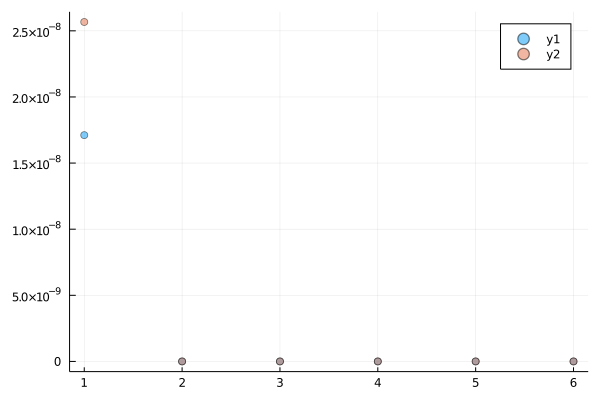

In [18]:
begin
	N = 6
	xk = 1:N
	A = Arqui.(xk);
	yP = zeros(N) 
	yD = zeros(N)
	for i ∈ xk
		yP[i] = A[i][1] - π
		yD[i] = A[i][1] - A[i][2]
	end
	scatter(xk,yP,alpha=0.5)
	scatter!(xk,yD,alpha=0.5)
end


In [19]:
function ArquiBig(k)
		P = BigFloat(2sqrt(3))
		p = BigFloat(3)
		for i ∈ 1:6*2^k
			P = 2p*P/(p+P)
			p = sqrt(P*p)
		end
		Pi = zeros(BigFloat,2)
		Pi[1] = P
		Pi[2] = p
		return Pi
end

ArquiBig (generic function with 1 method)

In [20]:
typeof(ArquiBig(6))

Array{BigFloat,1}

In [21]:
Arqui(20)[2]
#@time Arqui(20)[1]

3.141592653589792

In [22]:
@time ArquiBig(20)[1]

  4.667838 seconds (75.50 M allocations: 3.938 GiB, 13.36% gc time)


3.141592653589793182406471521371066254564709916760259213159101882591282441594138

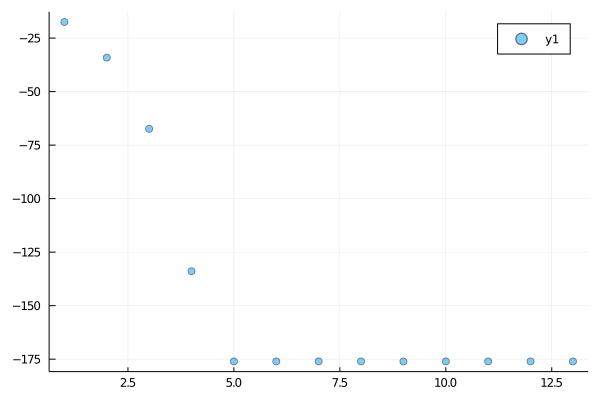

In [23]:
begin
	NB = 13
	xkB = 1:NB
	AB = ArquiBig.(xkB);
	yPB = zeros(BigFloat,NB) 
	yDB = zeros(BigFloat,NB)
	for i ∈ 1:NB
		yPB[i] = AB[i][1] - π
		yDB[i] = AB[i][1] - AB[i][2]
	end
	#scatter(xkB,yPB,alpha=0.5)
	scatter(xkB,log.(yDB),alpha=0.5)
end

**Parte b)**

In [24]:
function Pi_WR(N)
	P=4//3
	for n ∈ 2:N
		P = P * (2n)^2//((2n)^2 - 1)
	end
	return 2*P
end

Pi_WR (generic function with 1 method)

In [25]:
Pi_WR(15)

9007199254740992//2913690606794775

In [26]:
Float64(Pi_WR(15))

3.09133688859622

Con aritmética entera no se puede ir mucho más adelante con esta fórmula pues nos salimos de los **Int64**, por ejemplo si evaluamos para $N=20$ nos dará un error.

Con punto flotante no tenemos problema.

In [27]:
function Pi_WF(N)
	P=4/3
	for n ∈ 2:N
		P = P * (2n)^2/((2n)^2 - 1)
	end
	return 2*P
end

Pi_WF (generic function with 1 method)

In [28]:
Pi_WF(10^6)

3.1415918681924677

## Problema 8.

Dado el arreglo $A$, declarado de la siguiente manera
**real (kind(1.0)), dimension(50,20) :: a**
`Array(Float64,50,20)`
escriba (papel y lápiz) secciones de este arreglo representando:
	
	a. la primera fila de A;
	
	b. la última columna de A;
	
	c. un elemento de por medio en cada fila y columna.
    
    

In [59]:
N1 = 20
N2 = 10
#A = rand(N1,N2)
#A = ones(N1,N2)
A = [i*j for i ∈ 1:N2, j ∈ 1:N1]
#element = [1,2]
#A = fill(element,N1,N2)

10×20 Array{Int64,2}:
  1   2   3   4   5   6   7   8   9  …   14   15   16   17   18   19   20
  2   4   6   8  10  12  14  16  18      28   30   32   34   36   38   40
  3   6   9  12  15  18  21  24  27      42   45   48   51   54   57   60
  4   8  12  16  20  24  28  32  36      56   60   64   68   72   76   80
  5  10  15  20  25  30  35  40  45      70   75   80   85   90   95  100
  6  12  18  24  30  36  42  48  54  …   84   90   96  102  108  114  120
  7  14  21  28  35  42  49  56  63      98  105  112  119  126  133  140
  8  16  24  32  40  48  56  64  72     112  120  128  136  144  152  160
  9  18  27  36  45  54  63  72  81     126  135  144  153  162  171  180
 10  20  30  40  50  60  70  80  90     140  150  160  170  180  190  200

    a)

In [61]:
A[:,1]

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

    b)

In [62]:
A[1,:]

20-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
 15
 16
 17
 18
 19
 20

    c)

In [63]:
A[1:2:end,1:2:end]

5×10 Array{Int64,2}:
 1   3   5   7   9  11   13   15   17   19
 3   9  15  21  27  33   39   45   51   57
 5  15  25  35  45  55   65   75   85   95
 7  21  35  49  63  77   91  105  119  133
 9  27  45  63  81  99  117  135  153  171

## Problema 9.

Escriba un programa, que utilizando una subrutina, multiplique un vector de N elementos,
por una matriz de $N \times N$. 
El programa debe preguntar el valor de N y luego definir los arreglos, y darle
valores iniciales tal que, la matriz sea triangular superior, con todos sus elementos igual a 1, excepto los de
la diagonal que toman valor 3, el vector tendra todos sus elementos pares igual a 2, y los impares igual a 3.
No utilice **DO** para las inicializar el vector, ni **DO** anidados para inicializar la matriz.



In [75]:
function tarea9(N)
    A = zeros(N,N)
    v = fill(2,N)
    for i ∈ 1:N
        A[i,i] = 3
        A[i,i+1:N] .= 1
    end
    v[1:2:end] .= 3
    return A*v
end

tarea9(4)

4-element Array{Float64,1}:
 16.0
 11.0
 11.0
  6.0

## Problema 10.

Escriba un programa para calcular la posición y la velocidad en función del tiempo, para un problema de tiro oblicuo. Debe preguntar el ángulo (en grados) y la velocidad inicial (en m/seg.), asumiendo que el proyectil parte del origen. 
Elija el incremento temporal (Δt) de manera que la gráfica
tenga 600 puntos y abarque el intervalo entre el disparo y el instante en que el proyectil vuelve a tener
altura 0. 
Utilice funciones para calcular la posición y la velocidad. 
**Escriba la salida del programa en un
archivo de texto, con 5 columnas (t, x(t), y(t),vx(t),vy(t)). La primera línea debe comenzar con #, e incluir
la descripción de los datos de cada columna. Los datos en la tabla deben tener 6 cifras significativas y estar
escritos en notación exponencial.** Grafique x(t), y(t) y vy(t) en función de t, y la trayectoria del proyectil, **utilizando gnuplot**.

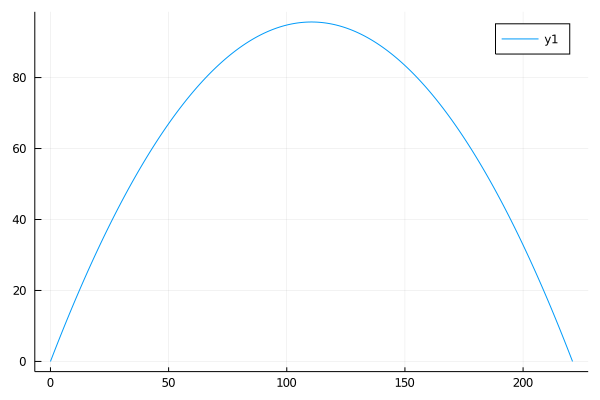

In [125]:
function trayectoria(θ, v)
    θ = θ/180*π #conversión a radianes 
    g = 9.8
    T = v*sin(θ)*2/g
    dt = T/600
    t = 0:dt:T
    x = v*cos(θ) .*t 
    y = v*sin(θ).*t .- g/2 .* t.^2
    return x, y
end

#scatter(trayectoria(60, 50))
plot(trayectoria(60, 50))

## Problema 11.

Se pretende calcular las sumas $S_N = \sum^N_{k=1} a_k$, donde $N$ es un número natural. 
Llamemos
$S'_N$ al valor calculado que se logra de hacer $(float)(S_{N-1} + a_N)$. 
Sea $S_N =\sum^N_{k=1} \frac{1}{k}$. Mostrar que $S'_N$ se
estaciona a partir de algún $N$ suficientemente grande. 
Deducir que a partir de entonces $S_N \neq S'_{N}$ . Hacer
un programa que determine el valor a partir del cual $S'_N$ se estaciona.

## Problema 12.
Para calcular un valor aproximado de π utilizaremos la siguiente serie infinita alternante:

$\frac{\pi}{4} = \sum_{n=0}^{\infty} \frac{(-1)^n}{2n+1}$

Recordemos que una cota superior para el error cometido al truncar una serie alternante (de valor absoluto
decreciente) está dado por el valor absoluto del primer término despreciado. Escriba un programa que ingrese
el número de cifras decimales exactas con que se desea el valor de π (entre 1 y 5 cifras) y devuelva en pantalla
el número de términos que deben incluirse en la serie de arriba para obtener dicha precisión y a renglón siguiente
el valor de π obtenido de esta forma, truncado el resultado al número de cifras pedido.

El error está acotado por, $1/(2N + 1)$ donde $N$ es el orden del término en la serie. Queremos que ese error sea menor que $10^{-s}$, o sea menor que la $s$ cifra en base decimal, (donde hemos usado que el número $\pi$ tiene una única cifra entera), 

$$1/(2N + 1) < 10^{-s}$$.



In [103]:
function tarea12(cifras_10::Int64)
    #N = 10^cifras_10/2 # un poquito más grande pero es número entero.
    N = round((10^cifras_10 - 1)/2)
    pi = 0
    for n ∈ 0:N
        pi = pi + (-1)^n/(2n+1)
    end
        mypi = Float64(pi*4)
    println("π = $mypi, error = $(π - mypi) N = $N")
end
    tarea12(5)

π = 3.141612653189785, error = -1.9999599992104322e-5 N = 50000.0


## Problema 13.

Escribir un programa que pida una contraseña de tres dígitos y permita leer tres intentos.
Si el usuario da la contraseña correcta responde responde *Correcto* y queda inactivo, con este mensaje.
En caso contrario el programa escribe *Lo siento, contraseña equivocada* y se cierra de inmediato.

**No está completo, estoy viendo cual es la mejor opción**
A Pluto no le gusta la interacción vía Terminal, de hecho la ha sacado..."

In [29]:
function Input(prompt)
    println(prompt)
    readline()
end

Input (generic function with 1 method)

In [30]:
function my_access()
	for counter ∈ 1:3
		contraseña = Input("Entre su contraseña: ")
		if contraseña == "123"
			println("Constraseña correcta")
            return
		else 
			println("trate nuevamente")
		end
	end
    println("Demasiados Intentos")
	return
end
		

my_access (generic function with 1 method)

In [31]:
my_access()

Entre su contraseña: 
stdin> 123
Constraseña correcta


## Problema 14.
Escribir un programa que, dado un año y el nombre de un mes, **saque por pantalla** el número
de días del mes (tenga en cuenta que algunos años son bisiestos).

## Problema 15.

Escriba un programa que genere secuencialmente 10 archivos con nombre de salida diferentes
(dependiendo del valor que tome algún parámetro). En cada archivo, escriba bajo la forma de dupla $(x; f(x))$
una función evaluada en N puntos y que también dependa del parámetro (por ejemplo 
$y = sin(πωx)$, con $ω = 1, 2, 3, \ldots$). El loop debe cerrar cada archivo luego de escribir en él. En el mismo programa o en otro,
construya otro loop que abra secuencialmente los archivos y que (sin borrar los datos escritos) agregue otros
N puntos de la función $(x; f(x))$.
"

## Respuesta: 

Primero hacemos el caso de una sola función, la generamos y la grabamos a un archivo.
Si ya no ha sido hecho, incluimos el paquete **FileIO** para manejar archivos. 

In [32]:
#using FileIO
#using Plots

In [33]:
t = 100:0.1:200
T = [sin(2*π*tt/13 + 1.2) for tt ∈ t]
sizeof(t)
#sizeof(T)

48

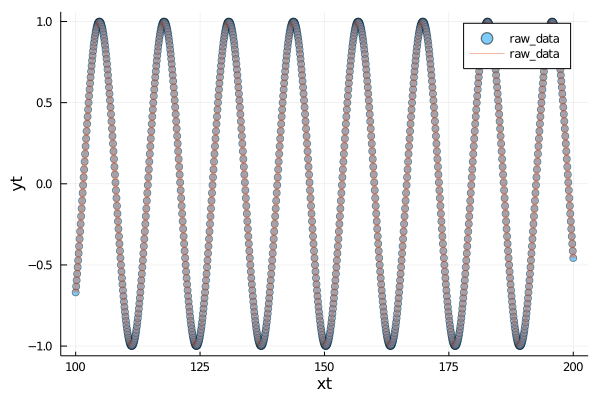

In [34]:
scatter(t,T, alpha = 0.5; label="raw_data", xlabel="xt", ylabel="yt")
plot!(t,T, alpha = 0.5; label="raw_data", xlabel="xt", ylabel="yt", linewidth=5)

Ahora los grabamos en un archivo. Es buena costumbre guardar los archivos de datos en un directorio separado. Los detalles de como están guardados los pueden encontrar en el paquete **JLD2**. El mismo ya es parte del paquete **FileIO**

In [35]:
save("Resultados/tide_data.jld2", Dict("xt" => t, "yt" => T))

Para constatar que está todo bien lo cargamos nuevamente (con otro nombre) y vemos que podemos operar los datos como antes.

In [36]:
t_load = load("tide_new.jld2", "xt")
T_load = load("tide_new.jld2", "yt");

Graficamos su diferencia:

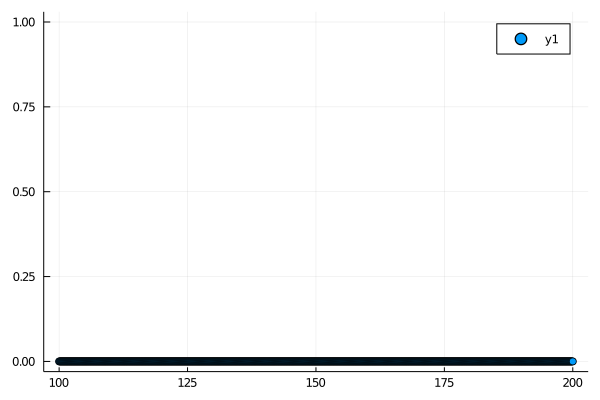

In [37]:
scatter(t,T-T_load)

Note que la variable t es guardada como un rango, lo que ahorra espacio de memoria. Compare (descomentando) los tipos y tamaños de ambas variables.

In [38]:
#typeof(T_load)
#typeof(t_load)

Array{Float64,1}

In [45]:
#sizeof(t_load)
#sizeof(T_load)

In [40]:
t_load

100.0:0.1:200.0

Para generar N archivos definimos un vector con los nombres de los mismos. Note que para trabajar con *strings* el símbolo **\$** permite adosar a una palabra otra, en este caso un número pero transformado a string. Por otro lado el símbolo multiplicación **\*** sirve en este caso para *sumar* dos palabras en una. Porqué Julia usa este símbolo y no el de suma? 

In [41]:
N=2
tides_name = ["tide_$i" * ".jld2" for i in 1:N]

2-element Array{String,1}:
 "tide_1.jld2"
 "tide_2.jld2"

Una vez creados estos N nombres los usamos en un `for` para guardar todos los archivos.

In [42]:
for i in 1:N
    t = 100:0.1:200
    ω = 2*π* i/N
    T = [sin(ω *tt + 1.2) for tt ∈ t]
    save("Resultados/" * tides_name[i], Dict("xt" => t, "yt" => T) )
end

Recuperamos los datos en un vector de vectores. Para ello tenemos que definir previamente ese vector, como no sabemos de antemano su tamaño usamos `undef`.
Note que como los datos de las *x* son los mismos para todas las funciones las recuperamos una sola vez. 

In [43]:
T_loads = Array{Array{Float64}}(undef,N)
t_load = load("Resultados/" * tides_name[1], "xt")
for i ∈ 1:N 
    T_loads[i] = load("Resultados/" * tides_name[i], "yt")
end

Finalmente constatamos sus valores y los usamos.

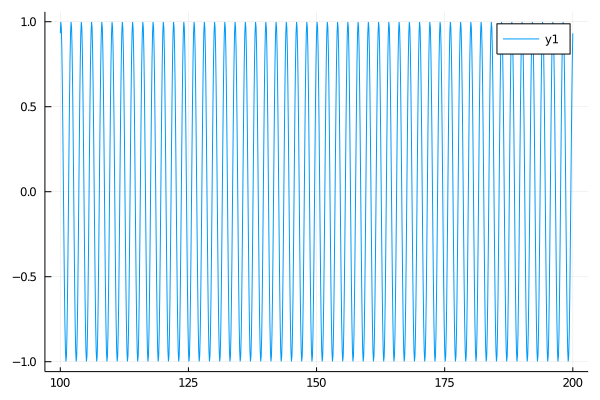

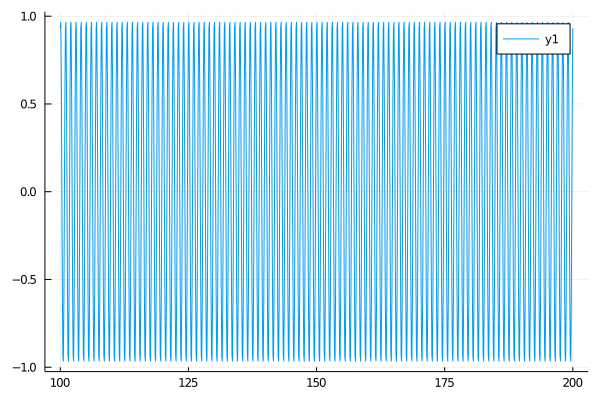

In [44]:
for i in 1:N
    xt = t_load
    yt = T_loads[i]
    display(plot(xt,yt))
end